In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [3]:
pdata = pd.read_csv("vehicle.csv")# read the data as a data frame

In [4]:
pdata.head() #checking the head of the data frame

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

## Basic EDA

In [5]:
pdata.shape

(846, 19)

In [6]:
pdata.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

### - The dataframe has 846 rows and 19 columns with 4 integer type and 1 object type(string) and 14 float types.

In [7]:
pdata.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

### - We have some null values for all comumns in the dataset, except for compactness,max.length_aspect_ratio,max.length_rectangularity,hollows_ratio,class columns

### - We will replace the null values with the median of that particular feature as it is not affected by outliers.

## Dealing with missing values

In [8]:
pdata = pdata.replace("",np.NaN)
pdata.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [9]:
pdata.median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [10]:
#replacing the missing values with median as median is not affected by outliers.
pdata1= pdata.drop(['class'],axis=1) # dropping class as class is a string variable.
medianFiller = lambda x: x.fillna(x.median()) 
pdata1 = pdata1.apply(medianFiller,axis=0) # every column missing values will be replaced with its median value.
pdata1.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107         44.0                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0         167.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183  
5             181.0      

In [82]:
pdata1.describe().T #Five point summary

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

### - From above five point summary we can say that variables like scaled_variance.1 have very high standard deviation of value 176.496341.

### - For some of the variables min value is 0

## Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000169FCDE9308>,
      dtype=object)

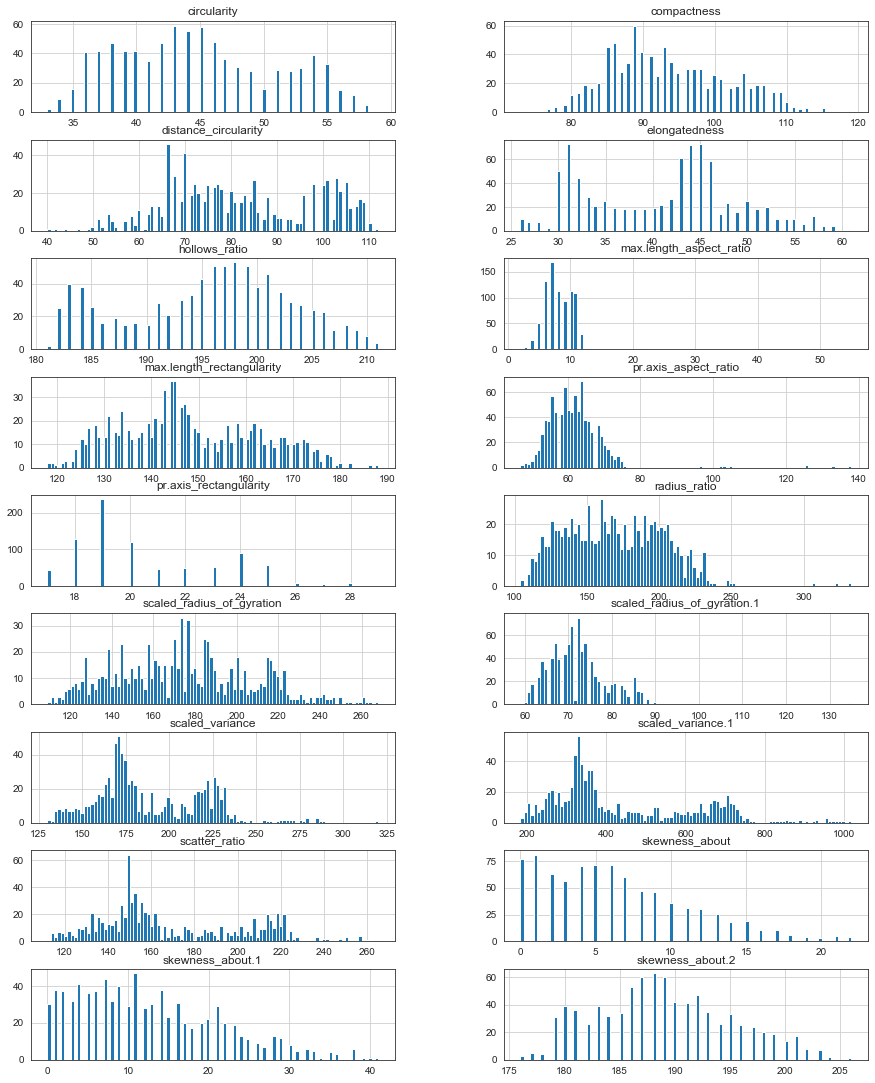

In [83]:
pdata1[columns].hist(stacked=False, bins=100, figsize=(15,30), layout=(14,2))

### - From above we can say that
### 1- radius_ratio,circularity,compactness, seems to be almost normally distributed with more than one peak.
### 2- Some of the variables are highly rightly skewed like pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_radius_of_gyration.1
### 3- Apart from above mentioned features other features doesn't seem to follow a particular pattern.

## Target column distribution

In [45]:
pdata.groupby('class').count()

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            218          214                   215           216   
car            429          428                   429           426   
van            199          199                   198           198   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     217                      218            218   
car                     428                      429            428   
van                     199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              218                     217                        218   
car              428                     428                        429   
van              199                     198                        199   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                218                218                        216   
car                427                427                        429   
van                198                199                        199   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            217             214               218   
car                            426             427               428   
van                            199             199               199   

       skewness_about.2  hollows_ratio  
class                                   
bus                 218            218  
car                 428            429  
van                 199            199

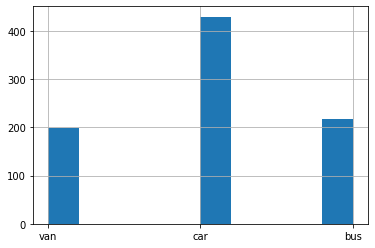

In [46]:
pdata['class'].hist(stacked=False)

### -The data set is skewed in terms of target column.There are few records in class 'van' and 'bus' than class 'car' i.e. there are more number of vehicles of van and bus model than car model.

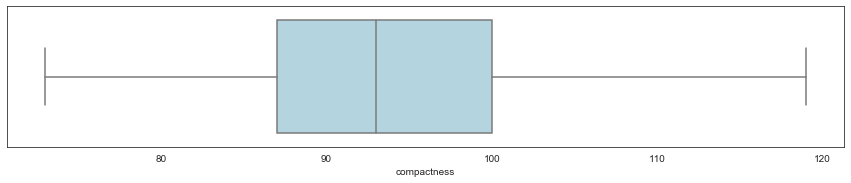

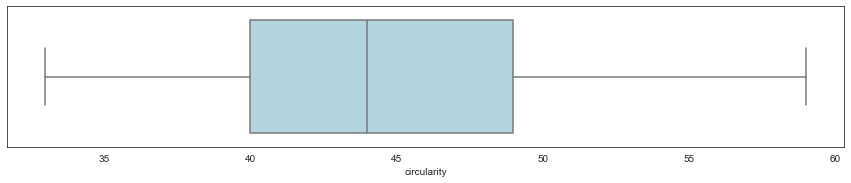

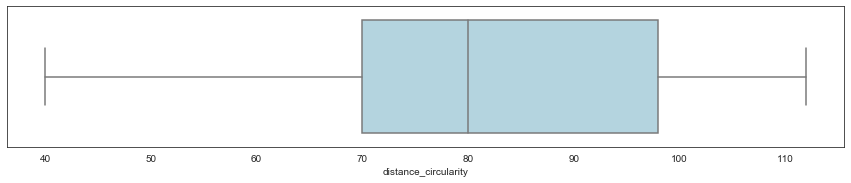

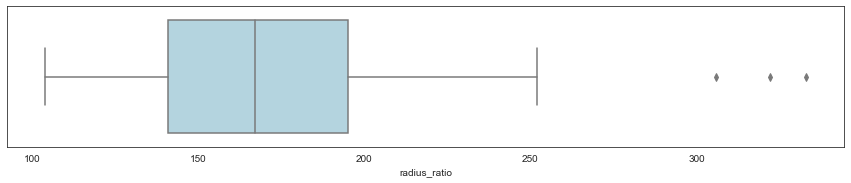

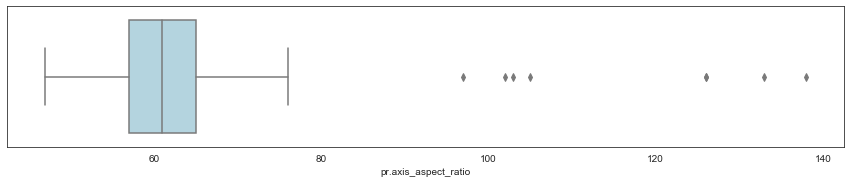

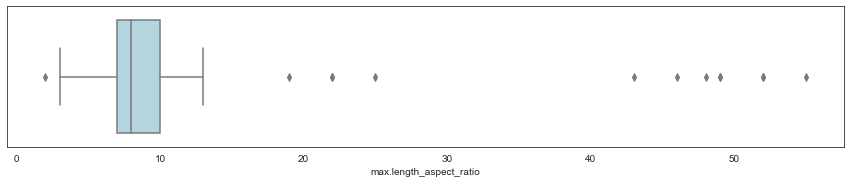

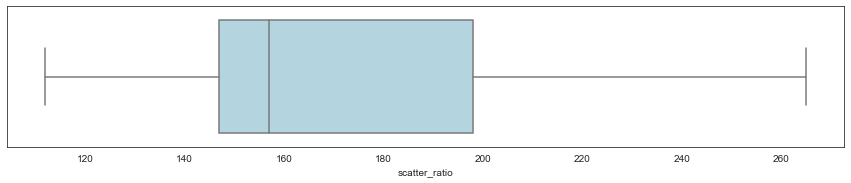

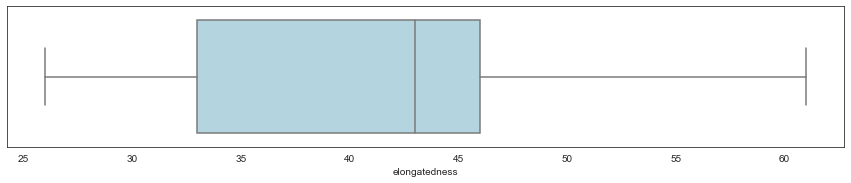

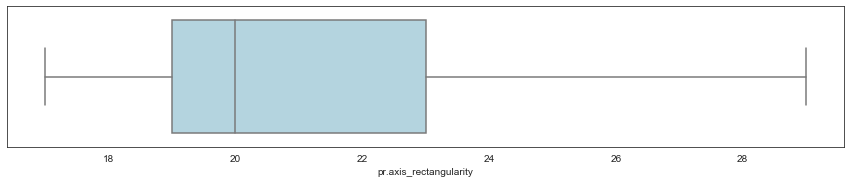

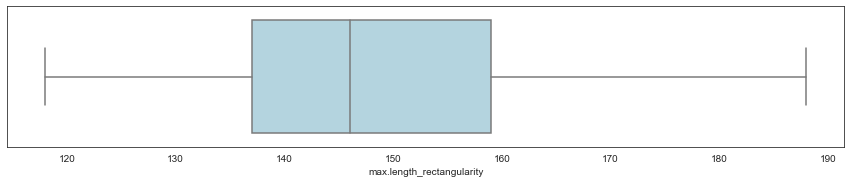

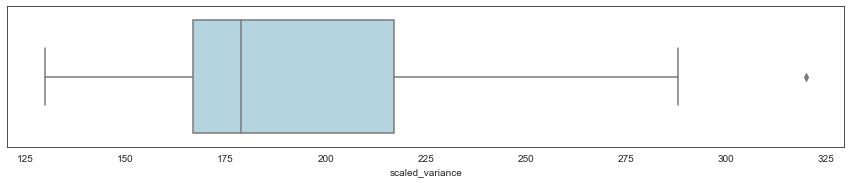

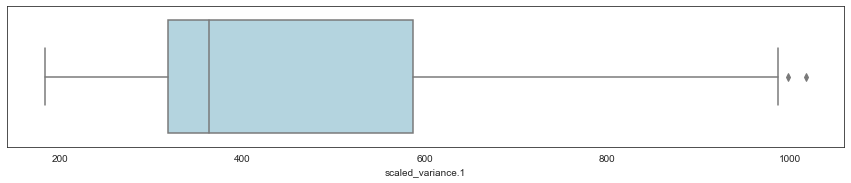

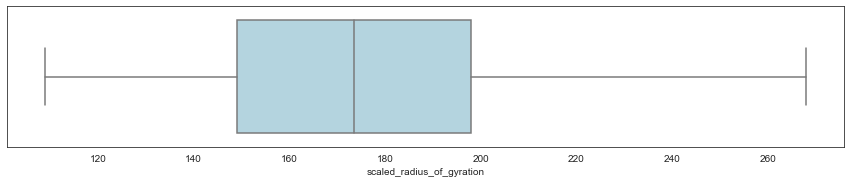

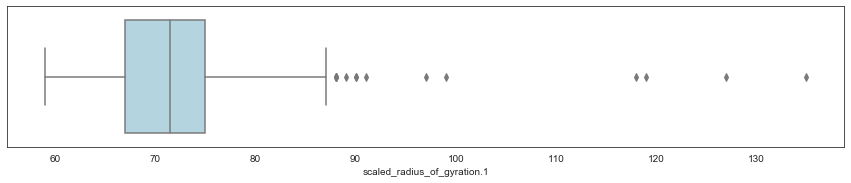

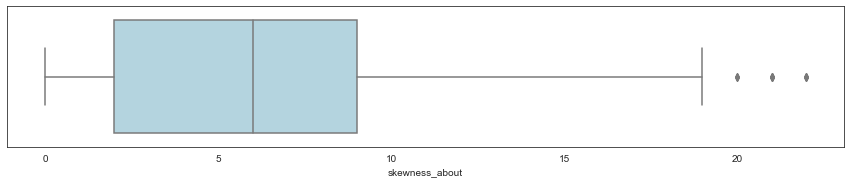

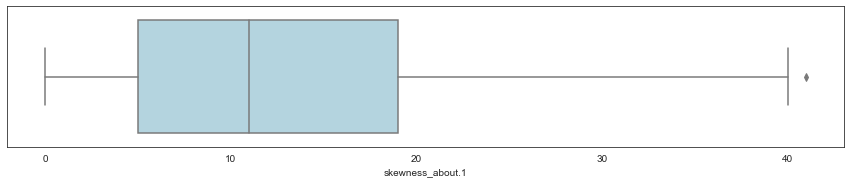

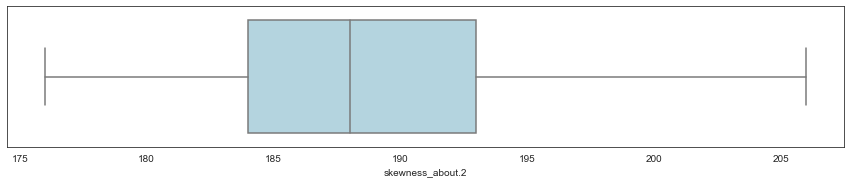

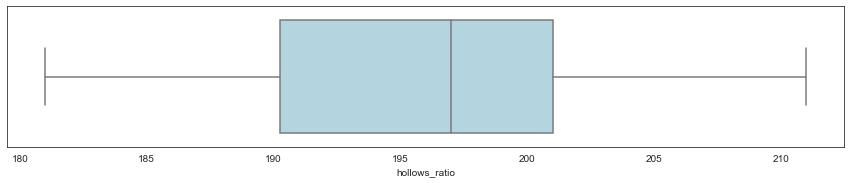

In [84]:
columns = pdata1.columns.values.tolist()
for column in columns:
    plt.figure(figsize= (15,15))
    plt.subplot(5,1,1)
    sns.boxplot(x= pdata1[column], color='lightblue')
    plt.show()

### 1- Some of the variables have extreme values(outliers) present like pr.axis_aspect_ratio,max.length_aspect_ratio,radius_ratio,scaled_radius_of_gyration.1, skewness about,skewness about.1

## Bivariate Analysis

### Identify Correlation in data

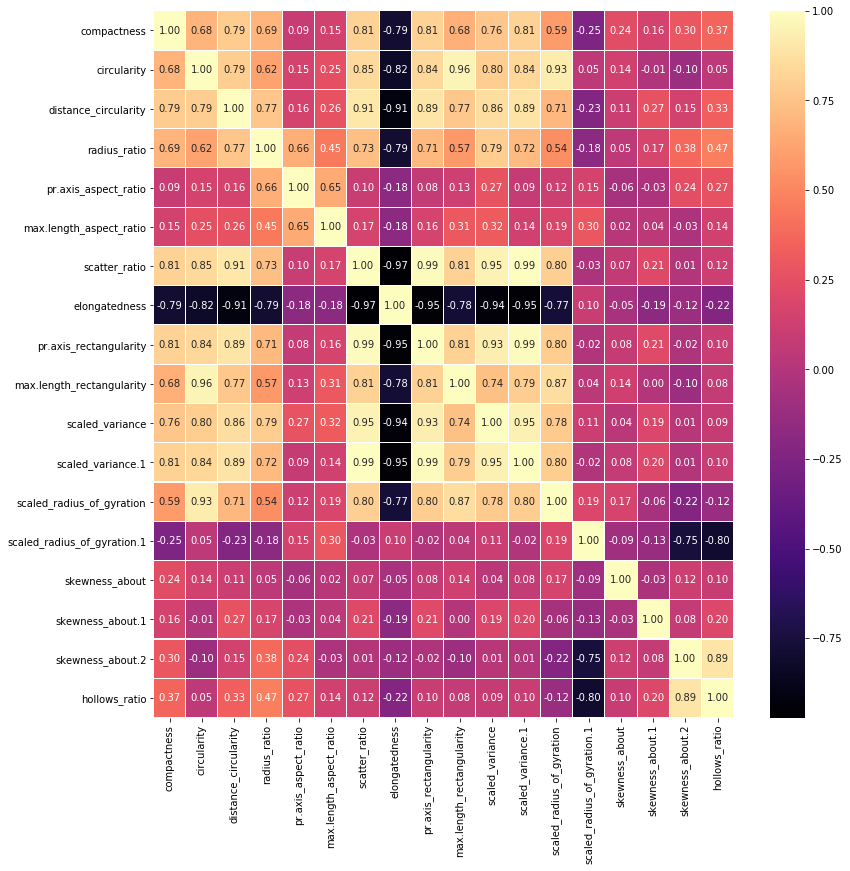

In [51]:
fig,ax = plt.subplots(figsize=(13, 13))   
sns.heatmap(pdata1.corr(), ax=ax, annot=True, linewidths=0.08, fmt= '.2f',cmap="magma")

### - From above heatmap diagram we can say that they is a fair amount of correlation between features
### - Variables like scaled_radius_of_gyration and circularity,max.length_rectangularity and circularity, scatter_ratio and scaled_variance etc. have a high amount of correlation between them almost equal to 1.

We should choose variables which have very high correlation with output variable i.e 'class'

## Bi-variate distribution of every possible attribute pair

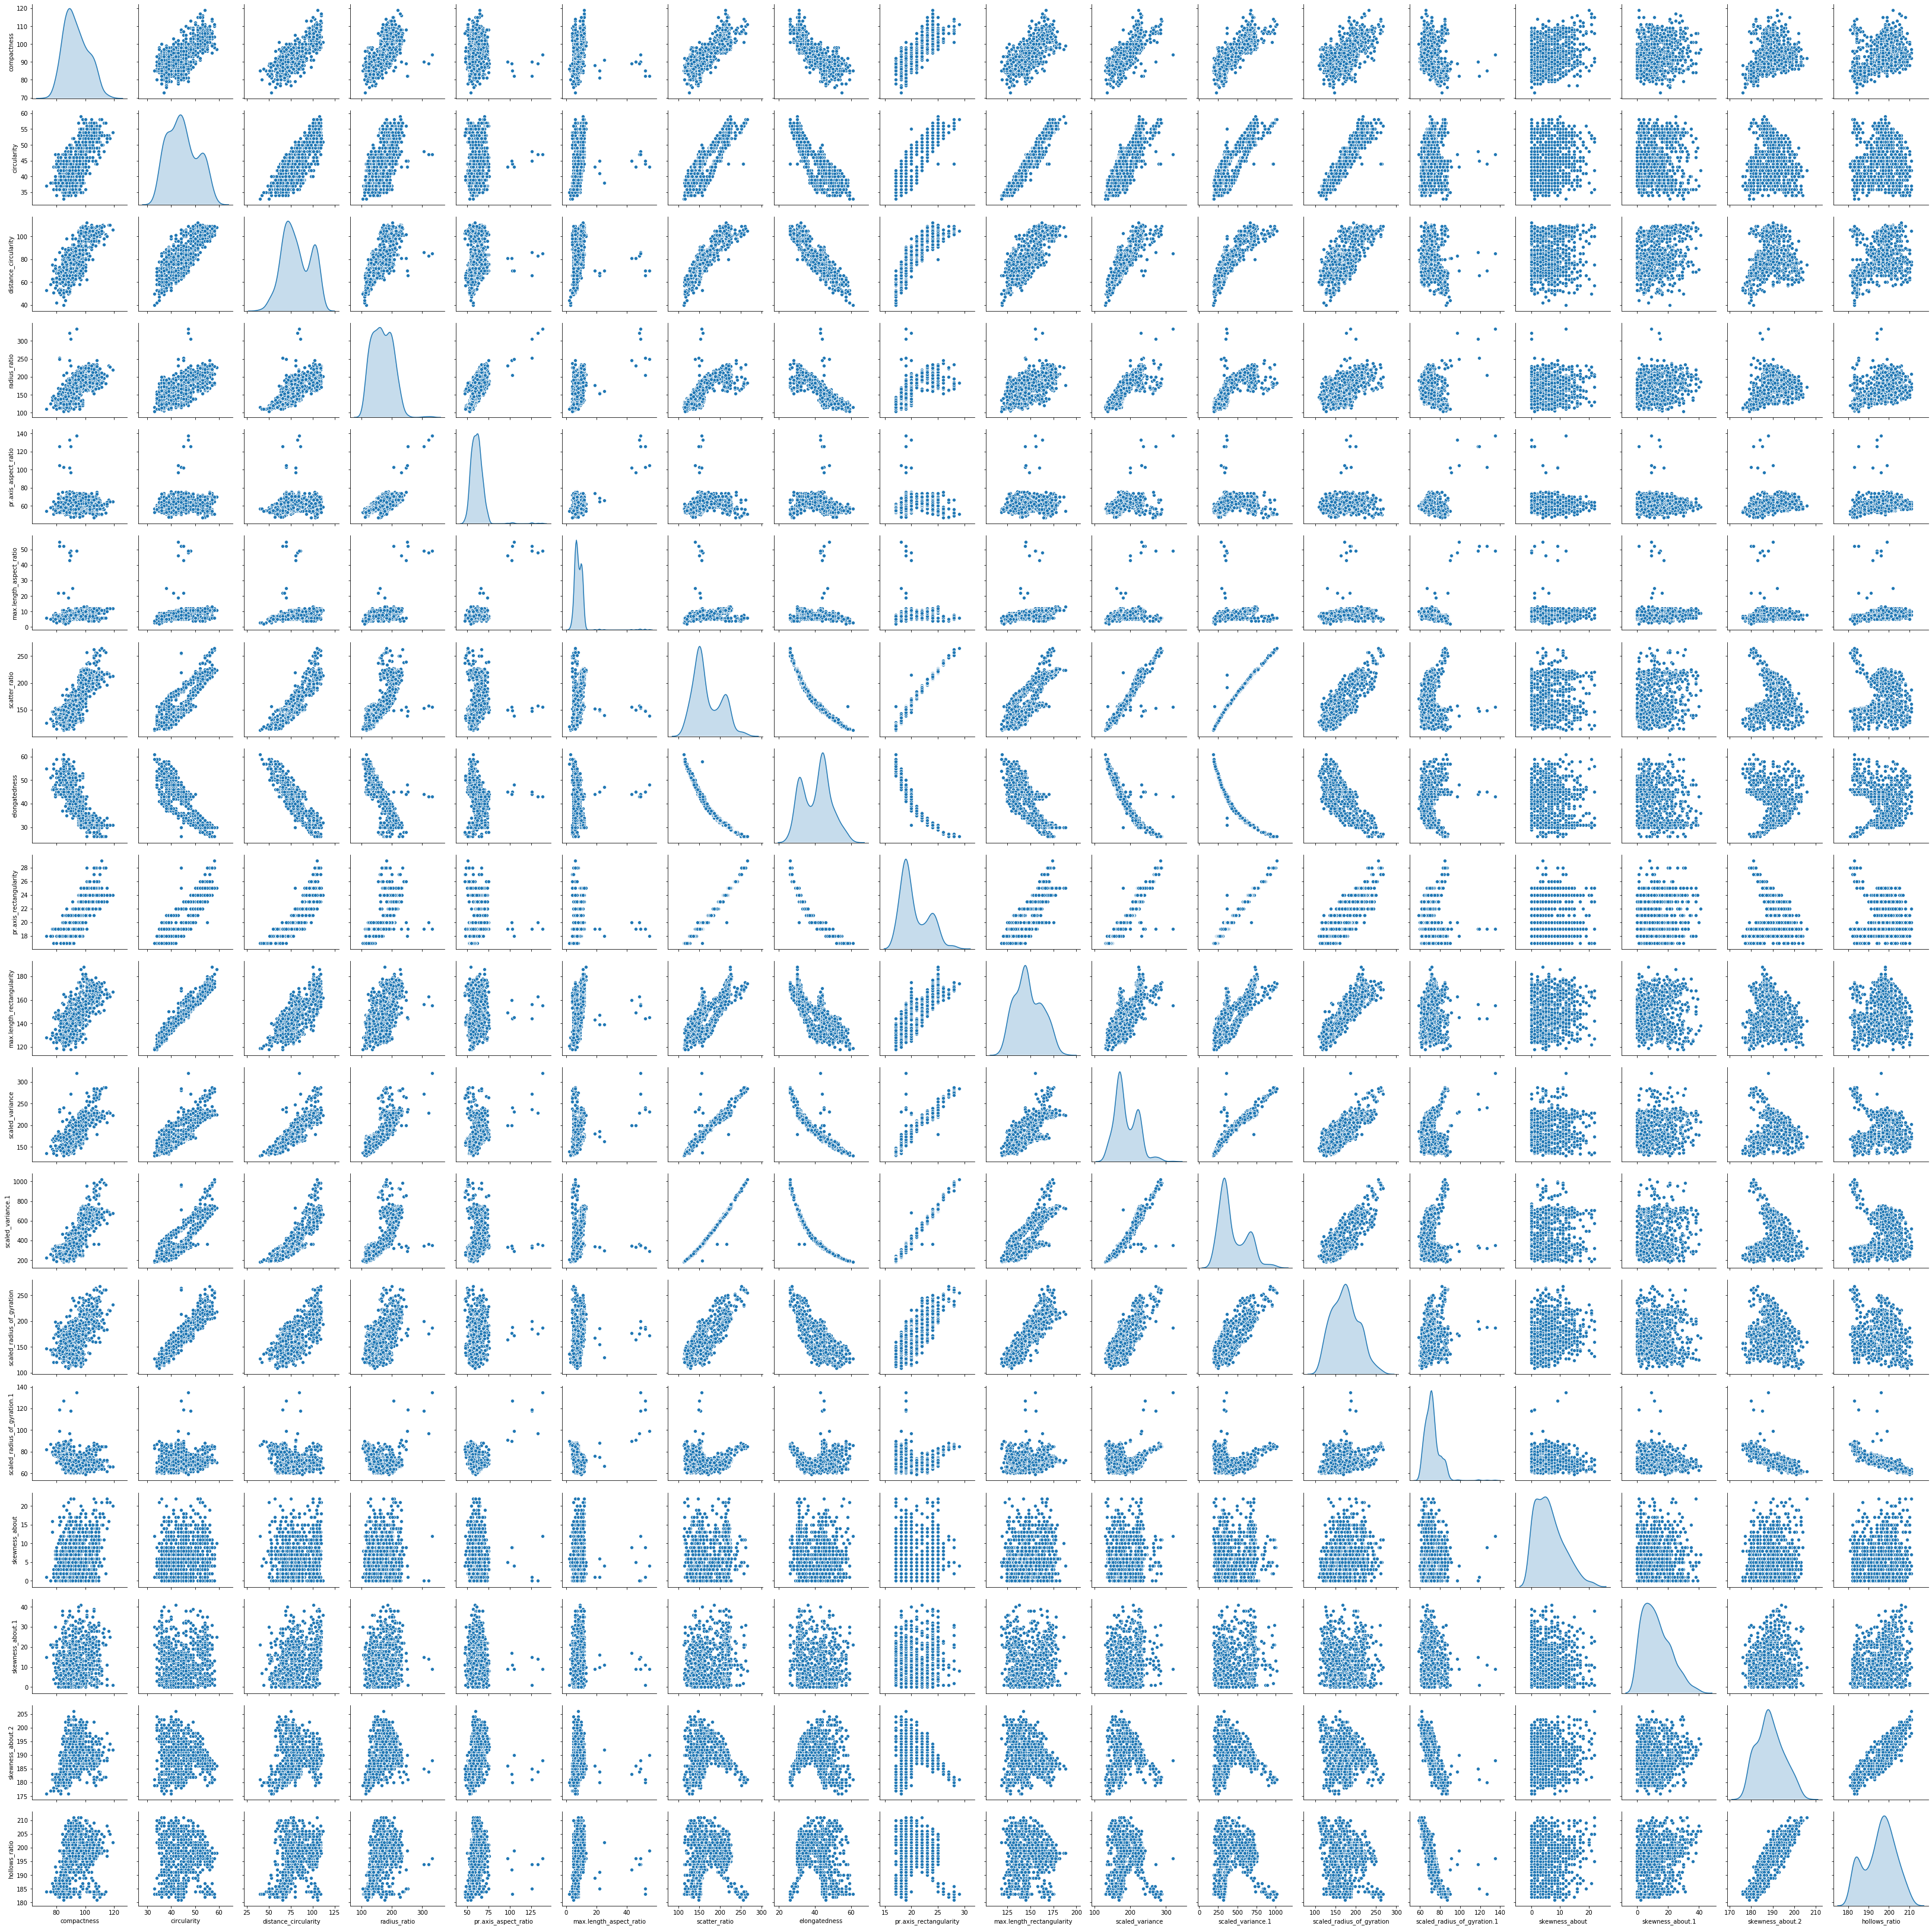

In [53]:
sns.pairplot(pdata1,diag_kind = 'kde')

### AS mentioned in the heatmap explanation , we can see in pairplot that some variables do have a positive and high correlation between them, while for some of the variables its almost 0.
### From the diagonal kernel density distribution we can see there are almost 2*2 = 4 clusters available in the dataset (two car type, one bus and one van) which for our study purpose have made two car type as one class 'car'

### Model Building

Spliting the data into 70:30 ratio

In [78]:
from sklearn.model_selection import train_test_split

X = pdata1
Y = pdata['class']

xScaled  = X.apply(zscore) #-scaling the data as well because the features are in different units and we will be using these scaled data for models like SVM and clustering
x_train, x_test, y_train, y_test = train_test_split(xScaled, Y, test_size=0.30, random_state=1)
# 1 is any random seed number

x_train.head()

compactness  circularity  distance_circularity  radius_ratio  \
350     0.403605     0.191843              1.201323      1.231975   
40      0.160580     0.518073              1.392014      1.351801   
89     -1.662107    -1.276191             -1.595478     -1.583947   
427    -0.933032    -1.113076              0.438559      0.213450   
353    -1.540595     0.354958             -0.832714     -0.685249   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
350              0.548738                -0.123383       0.696613   
40               0.675681                 0.094079       1.088438   
89              -0.847640                -0.558308      -1.322792   
427             -0.339866                 0.094079       0.003385   
353              0.294851                -0.558308      -0.539142   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
350      -0.760339                0.548746                   0.206877   
40       -1.144597                0.935290                   0.206877   
89        1.673292               -0.997430                  -1.585352   
427      -0.247996               -0.224342                  -1.102829   
353       0.392433               -0.610886                  -0.068850   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
350         0.619078           0.604821                  -0.175450   
40          1.225295           1.069695                   0.839091   
89         -1.486730          -1.192313                  -1.312965   
427         0.044767          -0.064144                  -0.821066   
353        -0.561451          -0.563032                   0.623885   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
350                    -0.863208       -1.094148          2.173450   
40                      0.208557       -0.277879         -0.403383   
89                      1.146352        0.334323         -0.851529   
427                    -0.729238        0.130256          2.285487   
353                     0.342528       -0.277879         -1.411710   

     skewness_about.2  hollows_ratio  
350          0.338542       0.587487  
40          -0.474650      -0.354082  
89          -1.775757      -1.564671  
427          0.663818       0.856507  
353         -0.962565      -1.026631

## Build Model

## SVM

In [79]:
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3) # gamma is a measure of influence of a data point. It is inverse of distance of influence. C is penalty of wrong classifications

In [80]:
clf.fit(x_train , y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [81]:
svm_labels = clf.predict(x_test)

In [82]:
from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, svm_labels)))
print()

Model Accuracy: 0.9567



### We have a pretty good score of almost 96% accuracy on test data.

Confusion Matrix
[[ 57   2   0]
 [  1 129   3]
 [  4   1  57]]


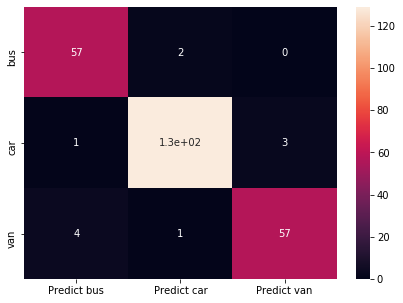

In [83]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, svm_labels, labels=['bus','car','van'])
print(cm)

df_cm = pd.DataFrame(cm, index = [i for i in ['bus','car','van']],
                  columns = [i for i in ["Predict bus","Predict car","Predict van"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [ ]:
The confusion matrix

True Positives (TP): we correctly predicted that there are 57 vans,57 bus,10 cars.
    
The True Negatives for a particular class is calculated by taking the sum of the values in every row and column except the row and column of the class we're trying to find the True Negatives for

True Negatives (TN) Van: we correctly predicted that there are 70 vehicles which are not van.

True Positives (TN) Car: we correctly predicted that there are 118 vehicles which are not car.

True Negatives (TN) bus: we correctly predicted that there are 15 vehicles which are not bus.

## K-fold Cross Validation

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [46]:
kfold = KFold(n_splits=10, random_state=1) #taking number of kfolds as 10
model = svm.SVC(gamma=0.025, C=3)
results = cross_val_score(model, xScaled, Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.95294118 0.97647059 0.96470588 1.         0.97647059 0.97647059
 0.98809524 0.96428571 0.96428571 0.97619048]
Accuracy: 97.399% (1.271%)


C:\Users\kjaiswal02\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### - So this is the average score 97% with a standard deviation of approx 1.3 % , So with 95% confidence interval we can say that this model in production will have accuracy in the range of 94.8% to 99.9%, Which is a pretty good score.

## PCA

In [26]:
covMatrix = np.cov(xScaled,rowvar=False) #the covaraince of scaled data is almost equal to the correlation matrix of the dataset 
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18) # as we have 18 dimensions /features apart from class variable
pca.fit(xScaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The eigen Values

In [28]:
print(pca.explained_variance_)

[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]


The eigen Vectors

In [29]:
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

And the percentage of variation explained by each eigen Vector

In [30]:
print(pca.explained_variance_ratio_)

[5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]


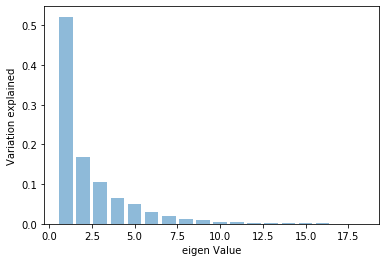

In [35]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

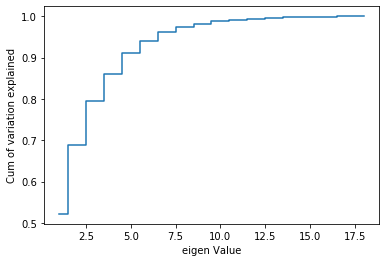

In [33]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

### - From above diagram we can say that we have captured around 95% of the data when we reduce dimemsionality to 6

## Dimensionality Reduction

Now 6 dimensions seems very reasonable. With 6 variables we can explain over 95% of the variation in the original data!

In [41]:
pca6 = PCA(n_components=6)
pca6.fit(xScaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(xScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [42]:
Xpca6

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00,
         1.76612370e-01,  7.93007079e-02, -7.57446693e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01,
         2.33234117e-01,  6.93948582e-01, -5.17161832e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02,
         1.20221219e+00,  7.31732265e-01,  7.05041037e-01],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01,
         2.95652324e-01, -1.34423635e+00, -2.17069763e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01,
        -1.93367514e+00,  4.27680052e-02, -4.02491279e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01,
        -1.22480708e+00, -5.40510367e-02, -3.35637136e-01]])

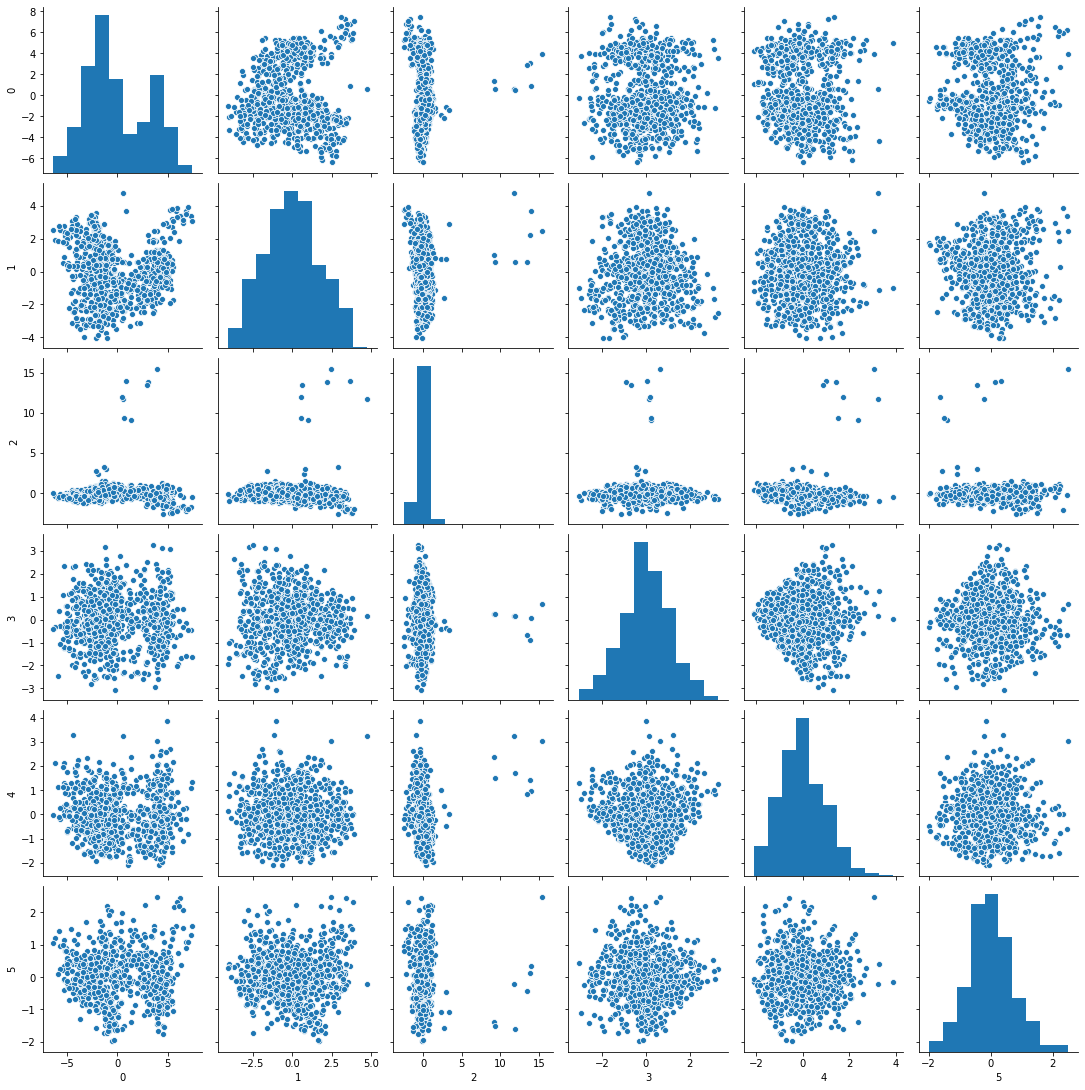

In [43]:
sns.pairplot(pd.DataFrame(Xpca6))

### -Now we can say the 6 new variables are idependent there is no correlation between them as compared to previous pairplot diagram.

## Fit SVM Model on new principal components

Spiliting the data

In [114]:
x_trainp, x_testp, y_trainp, y_testp = train_test_split(Xpca6, Y, test_size=0.30, random_state=1)
# 1 is any random seed number

In [93]:
clfP = svm.SVC(gamma=0.025, C=3) # gamma is a measure of influence of a data point. It is inverse of distance of influence. C is penalty of wrong classifications
clfP.fit(x_trainp , y_trainp)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [94]:
svm_labels_p = clfP.predict(x_testp)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_testp, svm_labels_p)))
print()

Model Accuracy: 0.8740



### K fold cross validation on PCA data

In [72]:
kfold = KFold(n_splits=10, random_state=1) #taking number of kfolds as 10
model = svm.SVC(gamma=0.025, C=3)
results = cross_val_score(model, Xpca6, Y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.87058824 0.84705882 0.88235294 0.83529412 0.83529412 0.94117647
 0.8452381  0.82142857 0.9047619  0.89285714]
Accuracy: 86.761% (3.578%)


C:\Users\kjaiswal02\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


## Comparison on scores

NON PCA data:
model accuracy: 95.6 
Cross validation score: 97.399% (1.271%)

PCA data:
model accuracy: 87.4
Cross validation score: 86.761% (3.578%)

### Looks like by reducing dimensionality to 6, the cross validation score on out of sample data decreased to  almost 87% (decrease by 10% when compared with cross validation score on non pca data . 

### Also there is reduction on accuracy of model on test data by almost 8 %
### we should keep in mind that this accuracy we are able to achieve by just 6 fetaures instead of 18 features!!

### As per my understanding we should not go for PCA rather we should choose k fold cross validation method on SVM model on non PCA data as accuracy on test data is decreased here.

## Grouping Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

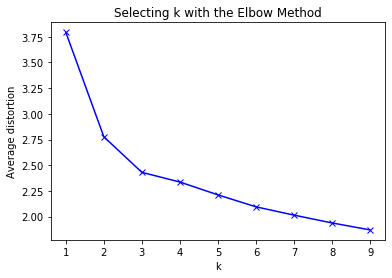

In [86]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Xpca6)
    prediction=model.predict(Xpca6) 
    meanDistortions.append(sum(np.min(cdist(Xpca6, model.cluster_centers_, 'euclidean'), axis=1)) / Xpca6.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Though the bend is not coming out clearly as there are many bends, let us look at 3 clusters on pca train data

In [101]:
final_model=KMeans(3)
final_model.fit(x_trainp)
prediction=final_model.predict(x_trainp)